# Quality Control of Whole Genome Sequencing

## Display metrics correlation

In [8]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import scipy.stats as stats

# Load the two pipelines metrics from a csv file
df=pd.read_csv("../n.100-1kg-dragen3.7.6-npm-sample-qc-dragen-correlation-metrics.csv")

df

,samples,snv,het-hom,ti-tv,snv-dragen,het-hom-dragen,ti-tv-dragen,insertion-dragen,deletion-dragen,insertion,deletion,ins-del-ratio-dragen,ins-del-ratio
0,NA20126,4592368,2.14,1.97,4770140,2.26,1.96,523917,536443,472931,494200,0.98,0.96
1,NA20127,4699751,2.04,1.97,4918959,2.18,1.97,562430,572733,485645,505302,0.98,0.96
2,NA20128,4636463,2.09,1.97,4854107,2.22,1.97,552634,566283,478801,500632,0.98,0.96
3,NA20129,4638940,2.11,1.97,4863336,2.23,1.97,552984,565534,478078,499867,0.98,0.96
4,NA20274,4339811,2.10,1.96,4554995,2.23,1.96,524046,530728,456420,471116,0.99,0.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,NA21135,3975358,1.59,1.96,4115967,1.67,1.95,467998,471144,425797,438778,0.99,0.97
96,NA21137,3985175,1.61,1.96,4160156,1.68,1.95,483979,489399,425960,440363,0.99,0.97
97,NA21141,3990468,1.59,1.95,4163396,1.66,1.95,484522,487820,425985,439259,0.99,0.97
98,NA21142,3974378,1.58,1.96,4145901,1.66,1.95,484512,488002,425350,438564,0.99,0.97


In [9]:
x = df['snv']
y = df['snv-dragen']

x_min = df['snv'].min()
x_max = df['snv'].max()

y_min = df['snv-dragen'].min()
y_max = df['snv-dragen'].max()

lineStart = min(x_min,y_min)
lineEnd = max(x_max,y_max)


Text(0.1, 0.95, 'r = 1.00')

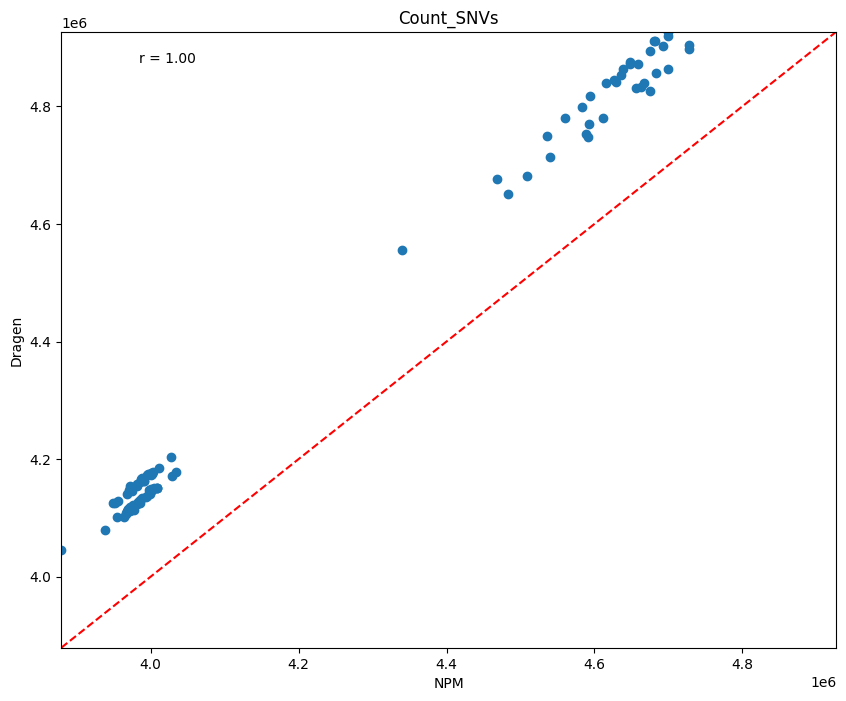

In [10]:
plt.scatter(x, y, c='tab:blue')
plt.xlabel('NPM')
plt.ylabel('Dragen')
plt.title('Count_SNVs')
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})

plt.plot([lineStart, lineEnd], [lineStart, lineEnd], color = 'r', linestyle = 'dashed')
plt.xlim(lineStart, lineEnd)
plt.ylim(lineStart, lineEnd)
r, p = stats.pearsonr(x, y)
plt.annotate('r = {:.2f}'.format(r), xy=(0.1, 0.95), xycoords='axes fraction')